## Analysis of Open Street Map Contributions using Python

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline

To get a good idea of the user data and contributions over time, I will look at the nodes and ways csv files that were wrangled above, loaded into pandas dataframes.

In [4]:
nodes = pd.read_csv("nodes.csv",parse_dates=['timestamp'])
ways = pd.read_csv("ways.csv",parse_dates=['timestamp'])
nodes_tags = pd.read_csv("nodes_tags.csv")
ways_tags = pd.read_csv("ways_tags.csv")

In [5]:
nodes.head()

,id,lat,lon,user,uid,version,changeset,timestamp
0,668163,34.008857,-118.058493,jerjozwik,36489,15,786030,2009-03-11 05:05:27
1,668164,34.007498,-118.060141,jerjozwik,36489,15,786030,2009-03-11 05:05:27
2,668165,34.002680,-118.065926,Sundance,239998,17,5070451,2010-06-25 00:11:24
3,668166,34.001222,-118.067053,Sundance,239998,18,5070451,2010-06-25 00:11:24
4,668167,33.999830,-118.067737,Sundance,239998,16,5070451,2010-06-25 00:11:24


In [6]:
ways_tags.head()

,id,key,value,type
0,13254889,name,Las Lomitas Drive,regular
1,13254889,highway,tertiary,regular
2,13254889,cfcc,A41,tiger
3,13254889,county,"Los Angeles, CA",tiger
4,13254889,reviewed,no,tiger


In [7]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914475 entries, 0 to 914474
Data columns (total 8 columns):
id           914475 non-null int64
lat          914475 non-null float64
lon          914475 non-null float64
user         914475 non-null object
uid          914475 non-null int64
version      914475 non-null int64
changeset    914475 non-null int64
timestamp    914475 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 55.8+ MB


In [8]:
ways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89337 entries, 0 to 89336
Data columns (total 6 columns):
id           89337 non-null int64
user         89337 non-null object
uid          89337 non-null int64
version      89337 non-null int64
changeset    89337 non-null int64
timestamp    89337 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 4.1+ MB


The Nodes file contains information on OSM nodes, and the ways the OSM ways. What I am interested in doing here is getting the data into a time series format, then plot contributions over time.

To do this, I will group each data frame by their timestamp to count the contributions by timestamp. This will result in both data frames being a format that will making joining them easy.

### Time Series Analysis

In [9]:
#getting the grouped contribution counts (by timestamp) and then resetting the index
time_series = pd.DataFrame(nodes['timestamp'].value_counts().reset_index())
time_series_ways = pd.DataFrame(ways['timestamp'].value_counts().reset_index())

#setting column names
time_series.columns = ['date', 'count']
time_series_ways.columns = ['date', 'count']

#joining the ways and nodes dataframes
time_series = time_series.append(time_series_ways)

#setting the index as the data
time_series.set_index(time_series["date"],inplace=True)

#summing the counts by week/Day
#time_series = time_series.resample("D").sum()
#time_series['date'] = time_series.index

#filling in the null values with 0
time_series['count'].fillna(0,inplace=True)

time_series.head()

,date,count
date,,
2017-02-02 20:31:57,2017-02-02 20:31:57,178
2017-02-02 20:32:01,2017-02-02 20:32:01,174
2017-02-02 20:31:56,2017-02-02 20:31:56,173
2017-02-02 20:32:00,2017-02-02 20:32:00,173
2017-02-02 20:31:59,2017-02-02 20:31:59,172


In [10]:
#verifying the counts equal the amount of rows of the dataset
time_series['count'].sum() == (nodes.shape[0] + ways.shape[0])

True

In [11]:
#Looking at new table
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34403 entries, 2017-02-02 20:31:57 to 2015-07-09 15:17:20
Data columns (total 2 columns):
date     34403 non-null datetime64[ns]
count    34403 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 806.3 KB


There are 34403 different timestamps. Let's take a look at the date range.

In [12]:
print "max:",time_series.index.min(), "min:",time_series.index.max()


max: 2007-11-18 21:16:53 min: 2017-10-21 10:44:06


The dataset has contributions from November 2007 to October 2017, when I started this project.

In [13]:
#Analyzing distributions
time_series.describe()

,count
count,34403.000000
mean,29.178037
std,31.625567
min,1.000000
25%,5.000000
50%,8.000000
75%,63.000000
max,178.000000


The new dataset has 34403 rows, with a mean of 29 contributions, and a max of 178 contributions.

### Time Series EDA

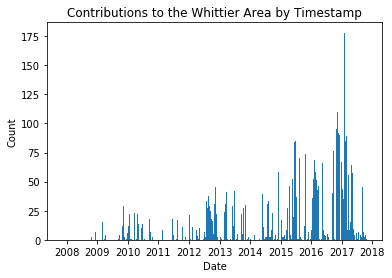

In [15]:
time_series.sort_index(inplace=True)
#time_series
ax = plt.subplot(111)
ax.bar(time_series.index, time_series['count'],width=10)
plt.ylabel("Count")
plt.xlabel("Date")
plt.title("Contributions to the Whittier Area by Timestamp")
ax.xaxis_date()

We see that contributions to the Whittier area increased over time, with a large spike in 2017. The max number of contributions occured in this area as well. 


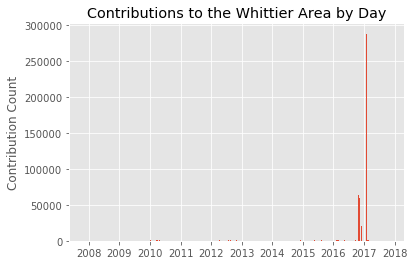

In [16]:
time_series = time_series.sort_values('date', ascending=True)

#summing the counts by week/Day
time_week = time_series.resample("D").sum()

#plt.figure(figsize=(12,6))
plt.style.use("ggplot")
#plt.bar(bottom=time_week.index, height=time_week['count'],data=time_week)
#plt.xticks(rotation=45)
plt.ylabel("Contribution Count")
plt.title("Contributions to the Whittier Area by Day")

ax = plt.subplot(111)
#ax.bar(x, y, width=10)
ax.bar(time_week.index,time_week['count'],width=10)
ax.xaxis_date()

The most of the contributions came from what looks like 2 days, one in late 2016 and the other in early 2017. I think that the la_buildings users could be involved here. Let's see.
    

In [17]:
nodes[(nodes['timestamp'].dt.year == 2017) |
      (nodes['timestamp'].dt.year == 2016)]['user'].value_counts().head(10)

calfarome_labuilding      193629
yurasi_import             159068
piligab_labuildings       117942
RichRico_labuildings      109861
ridixcr_import             83508
manoharuss_imports         65250
Jothirnadh_labuildings     63802
dannykath_labuildings      40427
karitotp_labuildings       33333
Luis36995_labuildings       9431
Name: user, dtype: int64

In [18]:
ways[(ways['timestamp'].dt.year == 2017) |
      (ways['timestamp'].dt.year == 2016)]['user'].value_counts().head(10)

calfarome_labuilding      17044
yurasi_import             14501
RichRico_labuildings      11527
piligab_labuildings       11093
ridixcr_import             8392
manoharuss_imports         6133
Jothirnadh_labuildings     4745
dannykath_labuildings      3934
karitotp_labuildings       3348
RichRico                    816
Name: user, dtype: int64

Sure enough, the top users here are la_buiildings and _imports users. 

Let's now create a function that flags these users, then plot them compared to all contributions across time. 

### Analyzing contributions from _labuilding and _imports users

In [19]:
import re

def islab(string):
    if re.search(pattern="_labuilding", string=str(string)):
        return 1
    elif re.search(pattern="_imports", string=str(string)):
        return 1
    else:
        return 0

Testing the new function:

In [20]:
islab("john_labuilding")

1

In [21]:
#applying function across nodes dataframe
nodes['is_lab'] = nodes['user'].apply(lambda x: islab(x))
ways['is_lab'] = ways['user'].apply(lambda x: islab(x))

#creating dataframes
lab = nodes[nodes['is_lab']==1]
lab2 = ways[ways['is_lab']==1]

In [22]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636798 entries, 10391 to 913244
Data columns (total 9 columns):
id           636798 non-null int64
lat          636798 non-null float64
lon          636798 non-null float64
user         636798 non-null object
uid          636798 non-null int64
version      636798 non-null int64
changeset    636798 non-null int64
timestamp    636798 non-null datetime64[ns]
is_lab       636798 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 48.6+ MB


## Labuildings and imports User Conclusion

In [23]:
print "Contributions by _labuildings and _imports users"
print("Nodes Contributions:",sum(nodes['is_lab']))
print("Ways Contributions:",sum(ways['is_lab']))

totalContib = (nodes.shape[0] + ways.shape[0])
totalLaContib = (sum(nodes['is_lab']) +sum(ways['is_lab']))
print("Total Contib by above users:",totalLaContib)

print "\n"
print "Total Contributions:", totalContib
print "Proportion of contribtions by _labuilding and _imports users:"
print(float(totalLaContib)/totalContib)

Contributions by _labuildings and _imports users
('Nodes Contributions:', 636798)
('Ways Contributions:', 58988)
('Total Contib by above users:', 695786)


Total Contributions: 1003812
Proportion of contribtions by _labuilding and _imports users:
0.693143736078


Indeed, ~70% of the contributions came from 2 of the same sets of users, on 2 different days. This explains the lack of diversity in what has been noted.